In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score
import sklearn

In [66]:
X,y=sklearn.datasets.load_breast_cancer(return_X_y=True)
X=X.to_numpy()

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [68]:
type(X)

numpy.ndarray

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=123)

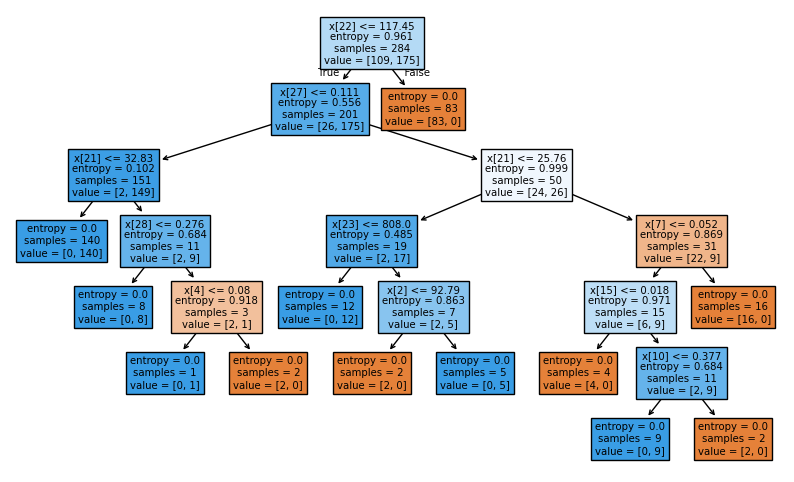

alpha: 0.0, # nodes: 29
score 0.9368421052631579
alpha: 0.009700308106209397, # nodes: 13
score 0.9578947368421052
alpha: 0.016239004320725975, # nodes: 7
score 0.9508771929824561
alpha: 0.016794138344598555, # nodes: 7
score 0.9508771929824561
alpha: 0.025641300909894416, # nodes: 5
score 0.9333333333333333
alpha: 0.027530222877448503, # nodes: 5
score 0.9333333333333333
alpha: 0.043588049585111796, # nodes: 5
score 0.9333333333333333
alpha: 0.04850442727674631, # nodes: 5
score 0.9333333333333333
alpha: 0.16338989364666828, # nodes: 3
score 0.9228070175438596
alpha: 0.5674159622653114, # nodes: 1
score 0.6385964912280702


In [21]:
clf=DecisionTreeClassifier(random_state=123,criterion='entropy')
clf.fit(X_train,y_train)

plt.figure(figsize=(10,6))
sklearn.tree.plot_tree(clf,filled=True)
plt.show()

path=clf.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas, impurities=path.ccp_alphas,path.impurities
clfs=[]
for ccp_alpha in ccp_alphas:
    clf=DecisionTreeClassifier(random_state=123,ccp_alpha=ccp_alpha)
    clf.fit(X_train,y_train)
    clfs.append(clf)
for clf in clfs:
    print(f"alpha: {clf.ccp_alpha}, # nodes: {clf.tree_.node_count}")
    print(f"score {clf.score(X_test,y_test)}")

## Bagging


for some M 
- - create bootstrap sample (sample with replacement)
- - fit tree
Aggregate predictions
- - majority vote
- - average for regression
- 

In [51]:
class Classifier_tree_bagging:
    def __init__(self,n,m):
        #nr of trees
        self.n=n
        #sample size
        self.m=m
        self.trees=[]
        
    def bootstrap(self,X,y):
        # Create bootstrap sample
        n_samples=X.shape[0]
        indices=np.random.choice(n_samples,self.m,replace=True)
        X_sample=X[indices]
        y_sample=y[indices]
        return X_sample,y_sample
    
    
    def fit(self,X_train,y_train):
        for i in range(self.n):
            # Create bootstrap sample
            X_sample,y_sample=self.bootstrap(X_train,y_train)
            # Fit tree
            clf=DecisionTreeClassifier(random_state=i)
            clf.fit(X_sample,y_sample)
            self.trees.append(clf)
    def predict(self,X_test):
        # Aggregate predictions
        predictions=np.array([clf.predict(X_test) for clf in self.trees])
        # Majority vote
        return np.bincount(predictions)

In [53]:
X_train.shape

(284, 30)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
505,9.676,13.14,64.12,272.5,0.12550,0.22040,0.11880,0.07038,0.2057,0.09575,...,10.600,18.04,69.47,328.1,0.20060,0.3663,0.2913,0.10750,0.2848,0.13640
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,...,15.110,19.26,99.70,711.2,0.14400,0.1773,0.2390,0.12880,0.2977,0.07259
29,17.570,15.05,115.00,955.1,0.09847,0.11570,0.09875,0.07953,0.1739,0.06149,...,20.010,19.52,134.90,1227.0,0.12550,0.2812,0.2489,0.14560,0.2756,0.07919
543,13.210,28.06,84.88,538.4,0.08671,0.06877,0.02987,0.03275,0.1628,0.05781,...,14.370,37.17,92.48,629.6,0.10720,0.1381,0.1062,0.07958,0.2473,0.06443
71,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,0.08980,...,9.733,15.67,62.56,284.4,0.12070,0.2436,0.1434,0.04786,0.2254,0.10840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,11.600,12.84,74.34,412.6,0.08983,0.07525,0.04196,0.03350,0.1620,0.06582,...,13.060,17.16,82.96,512.5,0.14310,0.1851,0.1922,0.08449,0.2772,0.08756
322,12.860,13.32,82.82,504.8,0.11340,0.08834,0.03800,0.03400,0.1543,0.06476,...,14.040,21.08,92.80,599.5,0.15470,0.2231,0.1791,0.11550,0.2382,0.08553
382,12.050,22.72,78.75,447.8,0.06935,0.10730,0.07943,0.02978,0.1203,0.06659,...,12.570,28.71,87.36,488.4,0.08799,0.3214,0.2912,0.10920,0.2191,0.09349
365,20.440,21.78,133.80,1293.0,0.09150,0.11310,0.09799,0.07785,0.1618,0.05557,...,24.310,26.37,161.20,1780.0,0.13270,0.2376,0.2702,0.17650,0.2609,0.06735


In [63]:

n=X_train.shape[0]
m=200
idxs=np.random.choice(n,m,replace=True)
X_train

KeyError: "None of [Index([200, 120,  83, 168,  67, 239, 276,  16, 278,  51,\n       ...\n        32, 241, 219,  53, 225, 273, 246,  33,  74, 251],\n      dtype='int64', length=200)] are in the [columns]"

In [52]:
clf=Classifier_tree_bagging(n=10,m=300)
clf.fit(X_train,y_train)
clf.predict(X_test)

KeyError: "None of [Index([237, 108, 130, 218,  53, 273, 202, 204,   2,  37,\n       ...\n       113, 174,  42,  83, 256,  33,  64,  75, 249, 197],\n      dtype='int32', length=300)] are in the [columns]"